In [73]:
import requests
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import plotly.express as px
import csv
import numpy as np

### **Importación de Datos**
* Obtenga los datos de la "Encuesta Nacional de Inclusión Financiera (ENIF) 2021", en la pestaña "Datos Abiertos".
* Se recomienda leer las nota técnica y la metodología localizada en el pagina
* Se suguiere usar la URL para descargar los datos y descomprimirlos
* Leer los conjuntos de datos "tmodulo" y "tsdem"
* Usar metodos de pandas para conocer su tipo de objecto para cada dataframe

In [74]:

def archivo(url, destino):

    response = requests.get(url)

    if response.status_code == 200:
    
        with open(destino, 'wb') as archivo:
            archivo.write(response.content)
        
        print("Archivo ZIP descargado con éxito.")

    
        with zipfile.ZipFile(destino, 'r') as zip_ref:
            zip_ref.extractall(os.path.dirname(destino))
        
        print("Archivo ZIP descomprimido con éxito.")
    else:
        print("Error al descargar el archivo.")

url = "https://www.inegi.org.mx/contenidos/programas/enif/2021/datosabiertos/conjunto_de_datos_enif_2021_csv.zip"
destino = "data2/conjunto_de_datos_enif_2021_csv"

archivo(url, destino)

Archivo ZIP descargado con éxito.
Archivo ZIP descomprimido con éxito.


In [75]:
# Leer el conjunto de datos "tmodulo" 
tmodulo_df = pd.read_csv("data2/conjunto_de_datos_tmodulo_enif_2021/conjunto_de_datos/conjunto_de_datos_tmodulo_enif_2021.csv") 
tmodulo_df

,FOLIO,VIV_SEL,HOGAR,N_REN,P3_1_1,P3_1_2,P3_2,P3_3,P3_4,P3_5,...,P14_3_3,P14_4_3,P14_2_4,TLOC,REGION,SEXO,EDAD,EST_DIS,UPM_DIS,FAC_ELE
0,1,1,1,1,0,0,4,2,1,8,...,NaN,NaN,2,1,3,2,83,3,1,3807
1,2,2,1,1,3,3,6,2,1,1,...,NaN,NaN,2,1,3,2,33,3,1,1903
2,3,3,1,4,3,2,1,2,2,1,...,NaN,NaN,2,1,3,1,30,3,1,8897
3,4,4,1,1,2,6,3,2,2,5,...,NaN,NaN,2,1,3,2,64,3,1,5710
4,5,5,1,1,2,5,5,2,1,8,...,NaN,NaN,2,1,3,1,70,3,1,14236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,13348,15,1,1,2,3,4,2,1,8,...,5.0,3.0,2,4,3,1,65,231,2013,1078
13550,13349,16,1,1,3,3,5,2,1,1,...,5.0,3.0,2,4,3,1,60,231,2013,2155
13551,13350,17,1,2,3,3,5,2,2,5,...,NaN,NaN,2,4,3,2,20,231,2013,1622
13552,13351,18,1,2,6,3,6,2,2,1,...,NaN,NaN,2,4,3,1,43,231,2013,2155


In [118]:
tipo_tmodulo = type(tmodulo_df)
print(f"El tipo de objeto de tmodulo es: {tipo_tmodulo}")

El tipo de objeto de tmodulo es: <class 'pandas.core.frame.DataFrame'>


In [77]:
# Leer el conjunto de datos "tsdem" 
tsdem_df = pd.read_csv("data2/conjunto_de_datos_tsdem_enif_2021/conjunto_de_datos/conjunto_de_datos_tsdem_enif_2021.csv")  
tsdem_df

,FOLIO,VIV_SEL,HOGAR,N_REN,P2_3,SEXO,EDAD,NIV,GRA,TLOC,REGION,EST_DIS,UPM_DIS,FAC_HOG
0,1,1,1,2,3,2,60,NaN,NaN,1,3,3,1,1841
1,1,1,1,1,1,2,83,2.0,2.0,1,3,3,1,1841
2,2,2,1,1,1,2,33,3.0,3.0,1,3,3,1,1841
3,2,2,1,2,3,1,15,NaN,NaN,1,3,3,1,1841
4,2,2,1,3,3,2,13,NaN,NaN,1,3,3,1,1841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47040,13352,20,1,1,1,1,49,0.0,0.0,4,3,231,2013,915
47041,13352,20,1,2,2,2,38,NaN,NaN,4,3,231,2013,915
47042,13352,20,1,3,3,1,20,NaN,NaN,4,3,231,2013,915
47043,13352,20,1,4,3,2,16,NaN,NaN,4,3,231,2013,915


In [119]:
tipo_tsdem = type(tsdem_df)
print(f"El tipo de objeto de tmodulo es: {tipo_tsdem}")

El tipo de objeto de tmodulo es: <class 'pandas.core.frame.DataFrame'>


### **Limpieza de Datos**
* Leer los cátalogos a través de una funcion (deberá desarrollar esta funcion) para cada dataframe "tmodulo" y "tsdem"
    * Dentro de los cátalogos de "tsdem"
        * En el cátalogo "edad",remover las filas con el cve "Años cumplidos"
    * Con el cátalogo "tmodulo"
        * En el cátalogo "edad",remover las filas con el cve "Años cumplidos"
        * En el cátalogo "p12_4",remover las filas con el cve "Meses"
        * En el cátalogo "p3_8a",remover las filas con el cve "Ingresos"
        * En el cátalogo "p10_9_2",remover las filas con el cve "Minutos"
        * En el cátalogo "p5_12",remover las filas con el cve "Número de veces"
        * En el cátalogo "p10_6_1",remover las filas con el cve "Horas"
        * En el cátalogo "p10_9_1",remover las filas con el cve "Horas"
        * En el cátalogo "p10_3_1",remover las filas con el cve "Horas"
        * En el cátalogo "p10_6_2",remover las filas con el cve "Minutos"
        * En el cátalogo "p6_9",remover las filas con el cve "Número de veces"
        * En el cátalogo "p10_3_2",remover las filas con el cve "Minutos"
* Remplazar los valores numéricos con los valores categóricos proporcionados por los cátalogos a través de una funcion
* Para "tmodulo" crear una columna de "rango de ingresos" usando una funcion
* Para "tmodulo" crear una columna de "rango de edad" usando una funcion
* Para "tsdem" removel el texto entre parentesis en la columna "REGION"

In [86]:

def leer_catalogos(carpeta, codificacion='utf-8'):
    archivos = os.listdir(carpeta)
    
    catalogos_dataframes = {}
    
    for archivo in archivos: 
        if archivo.endswith('.csv'):
            nombre_df = os.path.splitext(archivo)[0]
            ruta_completa = os.path.join(carpeta, archivo)
            df = pd.read_csv(ruta_completa, encoding=codificacion)
            
            catalogos_dataframes[nombre_df] = df
    
    return catalogos_dataframes

catalogos_tmodulo = "data2/conjunto_de_datos_tmodulo_enif_2021/catalogos"
catalogos_tsdem = "data2/conjunto_de_datos_tsdem_enif_2021/catalogos"


dataframes_tmodulo = leer_catalogos(catalogos_tmodulo, codificacion='latin-1')
dataframes_tsdem = leer_catalogos(catalogos_tsdem, codificacion='latin-1')

In [91]:
dic = {
    "edad.csv": "Años cumplidos"
}

def leer_archivos_csv(ruta_directorio):
    archivos_csv = glob.glob(ruta_directorio + "/*.csv")  # Corrección en la ruta
    diccionario = {}

    for archivo in archivos_csv:
        nombre_archivo = archivo.split("\\")[-1]  # Corrección en la ruta
        df = pd.read_csv(archivo, encoding='latin-1')  # Especificar la codificación Latin-1
        diccionario[nombre_archivo] = df

    return diccionario

def comparar_diccionarios(diccionario, dic_comparacion):
    for nombre_archivo, df in diccionario.items():
        if nombre_archivo in dic_comparacion:
            diccionario[nombre_archivo] = df[df["descrip"] != dic_comparacion[nombre_archivo]]

    return diccionario

ruta_directorio = "data2/conjunto_de_datos_tsdem_enif_2021/catalogos"  # Corrección en la ruta
dataframes_dict = leer_archivos_csv(ruta_directorio)

dataframes_tsdem = comparar_diccionarios(dataframes_dict, dic)

# Acceder a los DataFrames en el diccionario actualizado
for nombre_archivo, df in dataframes_tsdem.items():
    print(f"Archivo: {nombre_archivo}")
    print(df.head())
    print("--------------------")

Archivo: data2/conjunto_de_datos_tsdem_enif_2021/catalogos/sexo.csv
   cve descrip
0    1  Hombre
1    2   Mujer
--------------------
Archivo: data2/conjunto_de_datos_tsdem_enif_2021/catalogos/p2_3.csv
   cve                   descrip
0    1                   Jefa(e)
1    2  Esposa(o) o compañera(o)
2    3                   Hija(o)
3    4                  Nieta(o)
4    5           Otro parentesco
--------------------
Archivo: data2/conjunto_de_datos_tsdem_enif_2021/catalogos/niv.csv
   cve                                     descrip
0    0                                     Ninguno
1    1                         Preescolar o kinder
2    2                                    Primaria
3    3                                  Secundaria
4    4  Estudios técnicos con secundaria terminada
--------------------
Archivo: data2/conjunto_de_datos_tsdem_enif_2021/catalogos/tloc.csv
   cve                     descrip
0    1    100 000 y más habitantes
1    2  15 000 a 99 999 habitantes
2    3   2 5

In [93]:
dic = {
    "edad.csv": "Años cumplidos",
    "p12_4.csv": "Meses",
    "p3_8a.csv": "Ingresos",
    "p10_9_2.csv": "Minutos",
    "p5_12.csv": "Número de veces",
    "p10_6_1.csv": "Horas",
    "p10_9_1.csv": "Horas",
    "p10_3_1.csv": "Horas",
    "p10_6_2.csv": "Minutos",
    "p6_9.csv": "Número de veces",
    "p10_3_2.csv": "Minutos"
}
ruta_directorio = "data2/conjunto_de_datos_tmodulo_enif_2021/catalogos"  
dataframes_dict = leer_archivos_csv(ruta_directorio)

dataframes_tmodulo= comparar_diccionarios(dataframes_dict, dic)


for nombre_archivo, df in dataframes_tmodulo.items():
    print(f"Archivo: {nombre_archivo}")
    print(df.head())
    print("--------------------")

Archivo: data2/conjunto_de_datos_tmodulo_enif_2021/catalogos/p4_3.csv
   cve descrip
0    1      Sí
1    2      No
--------------------
Archivo: data2/conjunto_de_datos_tmodulo_enif_2021/catalogos/p5_24.csv
   cve                                            descrip
0    1  IPAB (Instituto para la Protección al Ahorro B...
1    2                                Fondo de protección
2    3                                               Otro
3    9                                            No sabe
--------------------
Archivo: data2/conjunto_de_datos_tmodulo_enif_2021/catalogos/p6_18_5.csv
   cve                                    descrip
0    1  Falta de garantía, fiadora, fiador o aval
1    2       No se declaró como opción afirmativa
--------------------
Archivo: data2/conjunto_de_datos_tmodulo_enif_2021/catalogos/p4_9_1.csv
   cve descrip
0    1      Sí
1    2      No
--------------------
Archivo: data2/conjunto_de_datos_tmodulo_enif_2021/catalogos/p6_4_9.csv
   cve      descrip
0    1  

In [94]:
def reemplazar_valores_por_categorias(dataframe, categorias_dict):

    for columna in dataframe.columns:
        posible_categoria = None
        for nombre_categoria in categorias_dict.keys():
            if columna.lower() in nombre_categoria.lower():
                posible_categoria = nombre_categoria
                break
        
        if posible_categoria:
            categorias = categorias_dict[posible_categoria]
            diccionario_categorias = dict(zip(categorias['cve'], categorias['descrip']))
            dataframe[columna] = dataframe[columna].apply(lambda x: diccionario_categorias.get(x, x))
    
    return dataframe

In [95]:
tmodulo_df = reemplazar_valores_por_categorias(tmodulo_df,dataframes_tmodulo)
tsdem_df = reemplazar_valores_por_categorias(tsdem_df,dataframes_tsdem)

In [96]:
columnas_ingresos = tmodulo_df[["P3_8A", "P3_8B"]].select_dtypes(include=[int, float])


tmodulo_df["ingresos_promedio"] = columnas_ingresos.mean(axis=1)

def rango_de_ingresos(ingresos):
    if ingresos < 10000:
        return "Menos de 10000"
    elif ingresos < 20000:
        return "10000 - 19999"
    elif ingresos < 30000:
        return "20000 - 29999"
    elif ingresos < 40000:
        return "30000 - 39999"
    else:
        return "40000 o más"

# Aplica la función a la columna "ingresos_promedio" y crea una nueva columna "rango_de_ingresos"
tmodulo_df["rango_de_ingresos"] = tmodulo_df["ingresos_promedio"].apply(rango_de_ingresos)


/var/folders/69/jwsf57w1749ds3vdzqhr26xm0000gn/T/ipykernel_28858/174334319.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/69/jwsf57w1749ds3vdzqhr26xm0000gn/T/ipykernel_28858/174334319.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [97]:
def rango_de_edad(edad):
    if edad < 18:
        return "Menos de 18"
    elif edad < 25:
        return "18 - 24"
    elif edad < 35:
        return "25 - 34"
    elif edad < 45:
        return "35 - 44"
    elif edad < 55:
        return "45 - 54"
    else:
        return "55 o más"


nueva_serie = tmodulo_df["EDAD"].apply(rango_de_edad)


tmodulo_df = pd.concat([tmodulo_df, nueva_serie.rename("rango_de_edad")], axis=1)

In [98]:
tsdem_df["REGION"] = tsdem_df["REGION"].str.replace(r'\(.*\)', '', regex=True)
tmodulo_df["REGION"] = tmodulo_df["REGION"].str.replace(r'\(.*\)', '', regex=True)

In [24]:
# Mandamos a llamar a la función para reemplazar valores en tsdem
tsdem_df = reemplazar_valores_con_catalogo(tsdem_df,dataframes_tsdem)

In [99]:
tsdem_df

,FOLIO,VIV_SEL,HOGAR,N_REN,P2_3,SEXO,EDAD,NIV,GRA,TLOC,REGION,EST_DIS,UPM_DIS,FAC_HOG
0,1,1,1,2,Hija(o),Mujer,60,NaN,NaN,100 000 y más habitantes,Occidente y Bajío,3,1,1841
1,1,1,1,1,Jefa(e),Mujer,83,Primaria,2.0,100 000 y más habitantes,Occidente y Bajío,3,1,1841
2,2,2,1,1,Jefa(e),Mujer,33,Secundaria,3.0,100 000 y más habitantes,Occidente y Bajío,3,1,1841
3,2,2,1,2,Hija(o),Hombre,15,NaN,NaN,100 000 y más habitantes,Occidente y Bajío,3,1,1841
4,2,2,1,3,Hija(o),Mujer,13,NaN,NaN,100 000 y más habitantes,Occidente y Bajío,3,1,1841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47040,13352,20,1,1,Jefa(e),Hombre,49,Ninguno,0.0,Menor de 2 500 habitantes,Occidente y Bajío,231,2013,915
47041,13352,20,1,2,Esposa(o) o compañera(o),Mujer,38,NaN,NaN,Menor de 2 500 habitantes,Occidente y Bajío,231,2013,915
47042,13352,20,1,3,Hija(o),Hombre,20,NaN,NaN,Menor de 2 500 habitantes,Occidente y Bajío,231,2013,915
47043,13352,20,1,4,Hija(o),Mujer,16,NaN,NaN,Menor de 2 500 habitantes,Occidente y Bajío,231,2013,915


## **Visualización**

### ¿Cuántas mujeres y cuantos hombres hay en estos datos?

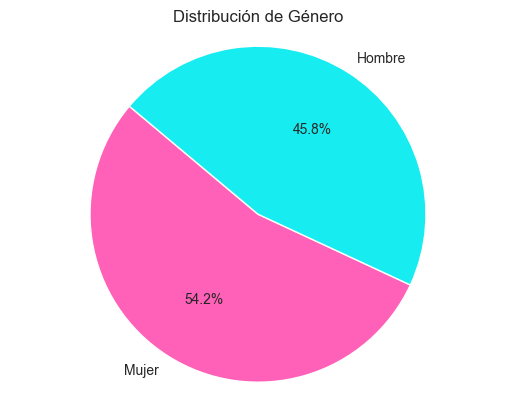

In [100]:
# Contar cuántos hombres y mujeres hay en tmodule
genero_counts = tmodulo_df['SEXO'].value_counts()

# Crea un gráfico circular para mostrar la distribución de género
plt.pie(genero_counts.values, labels=genero_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF61B9','#17EDF0'])
plt.axis('equal')  # Equal aspect ratio asegura que el gráfico sea un círculo

plt.title('Distribución de Género')
plt.show()


### ¿Cual es la distribución de edad?

/var/folders/69/jwsf57w1749ds3vdzqhr26xm0000gn/T/ipykernel_28858/2293188200.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



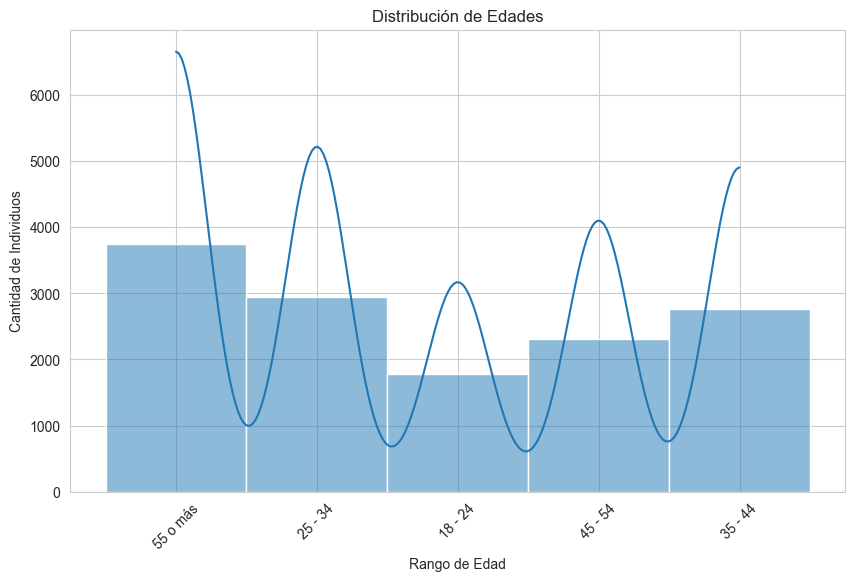

In [101]:
# Crea un histograma para mostrar la distribución de edades utilizando Seaborn
plt.figure(figsize=(10, 6)) 
sns.set_style('whitegrid') 
sns.histplot(data=tmodulo_df, x='rango_de_edad', bins=10, kde=True, palette='viridis')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Individuos')
plt.title('Distribución de Edades')
plt.xticks(rotation=45) 

plt.show()


### ¿Cuantos individuos hay por rango de edad?

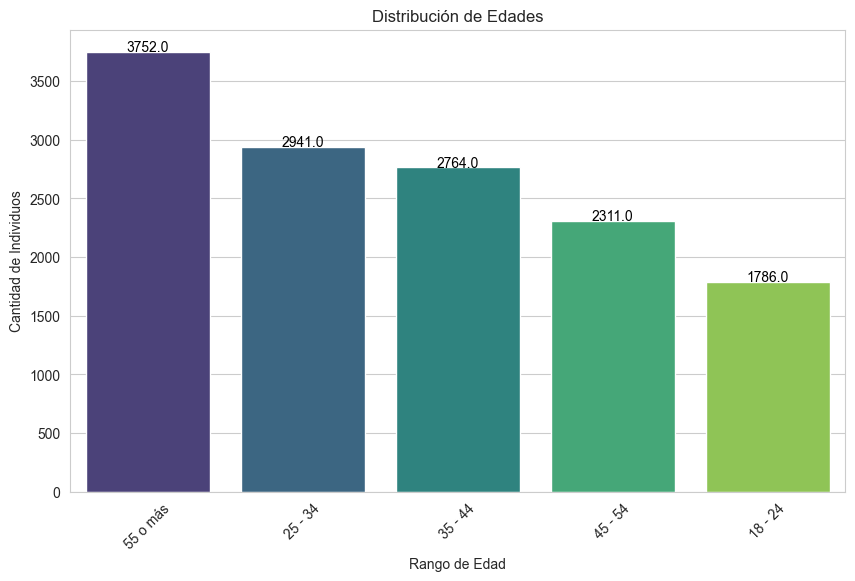

In [102]:
# Crea un gráfico de barras para mostrar la distribución de edades utilizando Seaborn
plt.figure(figsize=(10, 6)) 
sns.set_style('whitegrid') 
ax = sns.countplot(data=tmodulo_df, x='rango_de_edad', order=tmodulo_df['rango_de_edad'].value_counts().index, palette='viridis')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Individuos')
plt.title('Distribución de Edades')
plt.xticks(rotation=45) 
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 5), ha='center', fontsize=10, color='black')

plt.show()

### ¿Cual es la distribución de edad por sexo?

In [103]:
# Crear un DataFrame con los datos de las barras apiladas
data = {'Rango de Edad': tmodulo_df['EDAD'],
        'Sexo': tmodulo_df['SEXO']}
df_tabla = pd.DataFrame(data)

# Contar la cantidad de individuos por cada combinación de Rango de Edad y Sexo
tabla = df_tabla.groupby(['Rango de Edad', 'Sexo']).size().unstack(fill_value=0)

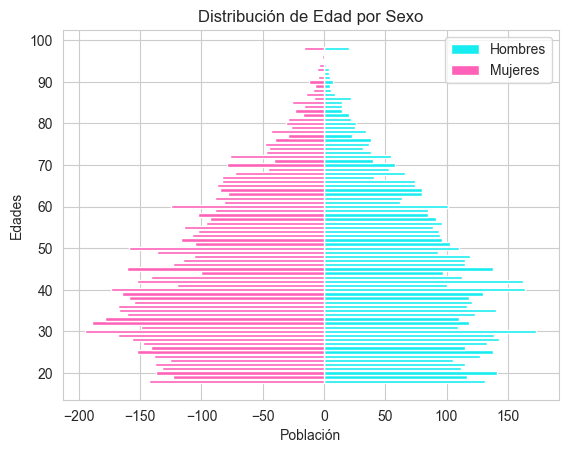

In [104]:
# Ajustar las edades
edades = tabla.index.tolist()

# Asegurarse de que las listas de hombres y mujeres tengan la misma longitud
hombres = tabla['Hombre'].tolist()
mujeres = tabla['Mujer'].tolist()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear barras para hombres y mujeres
ax.barh(edades, hombres, label='Hombres', color='#17EDF0')
ax.barh(edades, [-x for x in mujeres], label='Mujeres', color='#FF61B9')

# Personalizar el gráfico
ax.set_xlabel('Población')
ax.set_ylabel('Edades')
ax.set_title('Distribución de Edad por Sexo')
ax.legend(['Hombres', 'Mujeres'])

# Mostrar el gráfico
plt.show()

### ¿Cual es el nivel educativo por sexo?

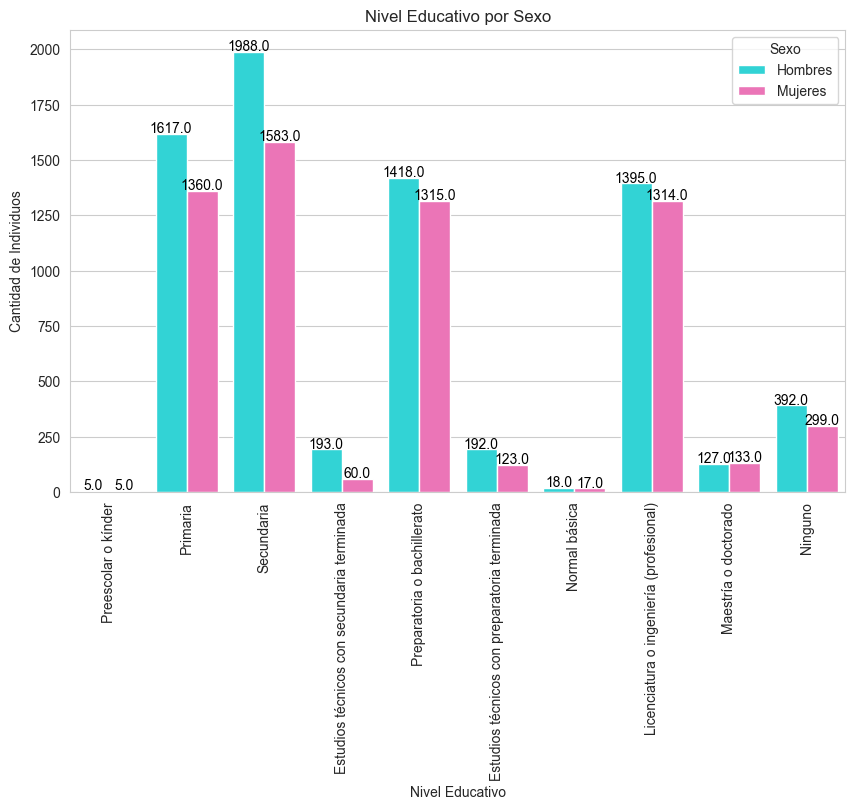

In [105]:
# Definir el orden personalizado
orden_personalizado = ['Preescolar o kínder', 'Primaria', 'Secundaria', 'Estudios técnicos con secundaria terminada', 'Preparatoria o bachillerato', 'Estudios técnicos con preparatoria terminada', 'Normal básica', 'Licenciatura o ingeniería (profesional)',  'Maestría o doctorado', 'Ninguno']

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))  
sns.set_style('whitegrid')


ax = sns.countplot(data=tmodulo_df, x='P3_1_1', hue='SEXO',
                   order=orden_personalizado, palette=['#17EDF0', '#FF61B9'])

plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad de Individuos')
plt.title('Nivel Educativo por Sexo')
plt.xticks(rotation=90) 

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 5), ha='center', fontsize=10, color='black')

plt.legend(title='Sexo', loc='upper right', labels=['Hombres', 'Mujeres'])
plt.show()

### ¿Cual es la distribucion de los ingresos de la población?

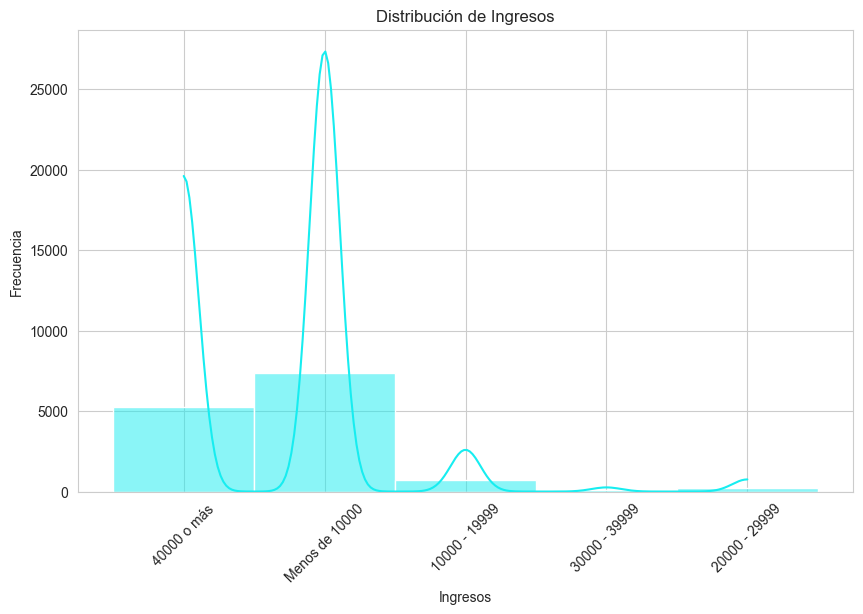

In [120]:
plt.figure(figsize=(10, 6))  
sns.set_style('whitegrid')  

sns.histplot(data=tmodulo_df, x='rango_de_ingresos', bins=20, kde=True, color='#17EDF0')

plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')
plt.xticks(rotation=45) 
plt.show()

### ¿Cuáles son las razones principales por las que adquirió cuentas bancarias?

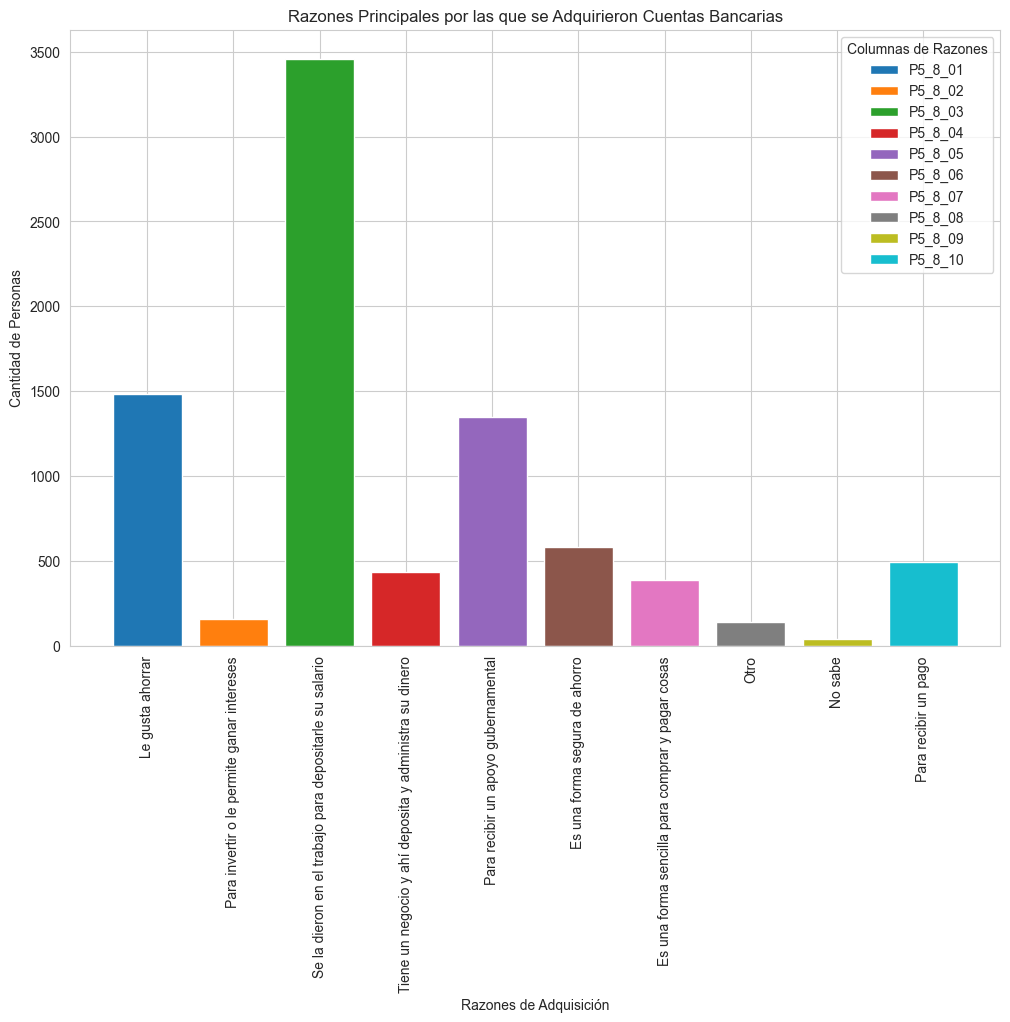

In [107]:
# Selecciona las columnas que contienen razones de adquisición
columnas_razones = ['P5_8_01', 'P5_8_02', 'P5_8_03', 'P5_8_04', 'P5_8_05', 'P5_8_06', 'P5_8_07', 'P5_8_08', 'P5_8_09', 'P5_8_10']  # Reemplaza con los nombres reales de las columnas

# Crea un DataFrame que contenga solo las columnas de razones de adquisición
df_razones = tmodulo_df[columnas_razones]

# Inicializa un diccionario para almacenar las frecuencias de razones
razones_frecuencias = {}
# Calcula las frecuencias de cada razón en cada columna
for columna in columnas_razones:
    frecuencias = df_razones[columna].value_counts()
    # Excluye la razón con la frecuencia más alta
    frecuencias = frecuencias.iloc[1:]
    razones_frecuencias[columna] = frecuencias

# Crea un gráfico de barras apiladas para mostrar las razones principales de adquisición en cada columna
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico según tus preferencias

# Recorre las columnas y crea una barra apilada para cada una
for columna, frecuencias in razones_frecuencias.items():
    plt.bar(frecuencias.index, frecuencias.values, label=columna)

plt.xlabel('Razones de Adquisición')
plt.ylabel('Cantidad de Personas')
plt.title('Razones Principales por las que se Adquirieron Cuentas Bancarias')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para mayor legibilidad
plt.legend(title='Columnas de Razones')
plt.show()

### ¿Con cuáles instituciones o bancos tiene las cuentas que contrató?

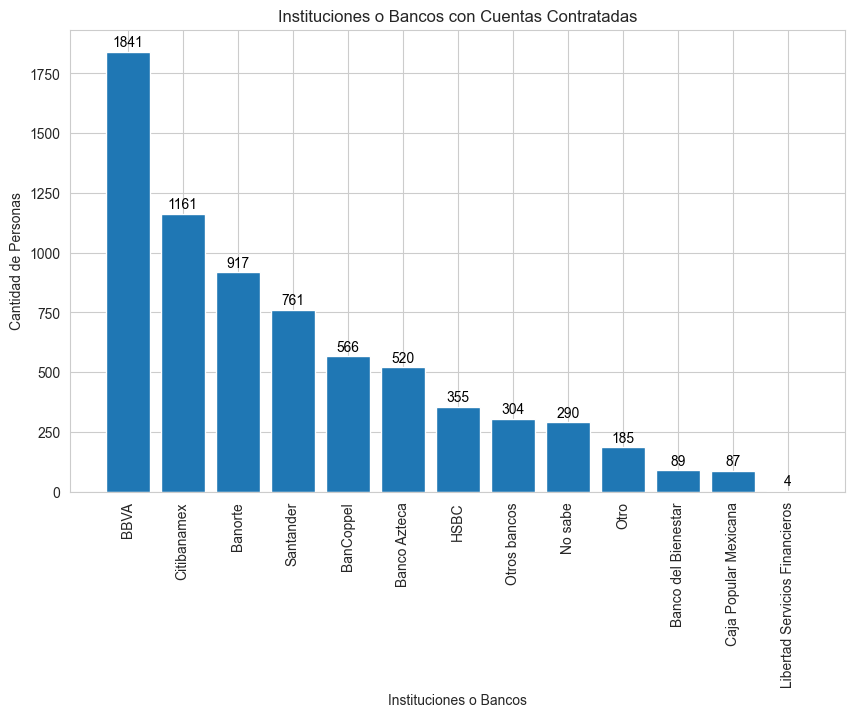

In [108]:
# Obtén las frecuencias de cada institución o banco
# Selecciona las columnas que contienen información sobre las instituciones o bancos
columnas_instituciones = ['P5_18_01', 'P5_18_02', 'P5_18_03', 'P5_18_04', 'P5_18_05', 'P5_18_06', 'P5_18_07', 'P5_18_08', 'P5_18_09', 'P5_18_10', 'P5_18_11', 'P5_18_12', 'P5_18_99']  # Reemplaza con los nombres reales de las columnas

# Crea una lista para almacenar todas las instituciones o bancos
instituciones_lista = []

# Concatena los datos de todas las columnas en una sola lista
for columna in columnas_instituciones:
    instituciones_lista.extend(tmodulo_df[columna])

# Crea un DataFrame a partir de la lista consolidada
instituciones_df = pd.DataFrame({'Instituciones': instituciones_lista})

# Obtén las frecuencias de cada institución o banco
instituciones_counts = instituciones_df['Instituciones'].value_counts()

# Excluir la institución con la frecuencia más alta
instituciones_counts = instituciones_counts.iloc[1:]  # Excluye la primera fila

# Crea un gráfico de barras para mostrar las instituciones o bancos con cuentas contratadas
plt.figure(figsize=(10, 6))
bars = plt.bar(instituciones_counts.index, instituciones_counts.values)
plt.xlabel('Instituciones o Bancos')
plt.ylabel('Cantidad de Personas')
plt.title('Instituciones o Bancos con Cuentas Contratadas')
plt.xticks(rotation=90)

# Agrega etiquetas de cantidad en la parte superior de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.show()


### En general, ¿qué medios utiliza para consultar o hacer movimientos en sus cuentas?

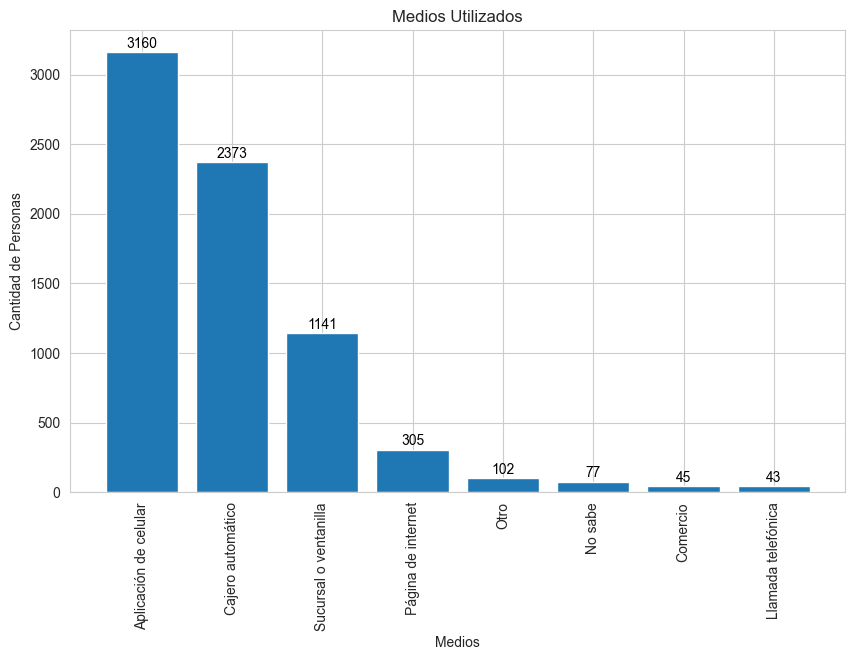

In [109]:
# Selecciona las columnas que contienen información sobre las instituciones o bancos
columnas_medios = ['P5_19_1', 'P5_19_2', 'P5_19_3', 'P5_19_4', 'P5_19_5', 'P5_19_6', 'P5_19_7', 'P5_19_9']  # Reemplaza con los nombres reales de las columnas

# Crea una lista para almacenar todas las instituciones o bancos
medios_lista = []

# Concatena los datos de todas las columnas en una sola lista
for columna in columnas_medios:
    medios_lista.extend(tmodulo_df[columna])

# Crea un DataFrame a partir de la lista consolidada
medios_df = pd.DataFrame({'Medios': medios_lista})

# Obtén las frecuencias de cada institución o banco
medios_counts = medios_df['Medios'].value_counts()

# Excluir la institución con la frecuencia más alta
medios_counts = medios_counts.iloc[1:]  # Excluye la primera fila

# Crea un gráfico de barras para mostrar las instituciones o bancos con cuentas contratadas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias
bars = plt.bar(medios_counts.index, medios_counts.values)
plt.xlabel('Medios')
plt.ylabel('Cantidad de Personas')
plt.title('Medios Utilizados')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para mayor legibilidad

# Agrega etiquetas de cantidad en la parte superior de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.show()


### ¿Con cuáles instituciones o bancos tiene los créditos o tarjetas de crédito que contrató?

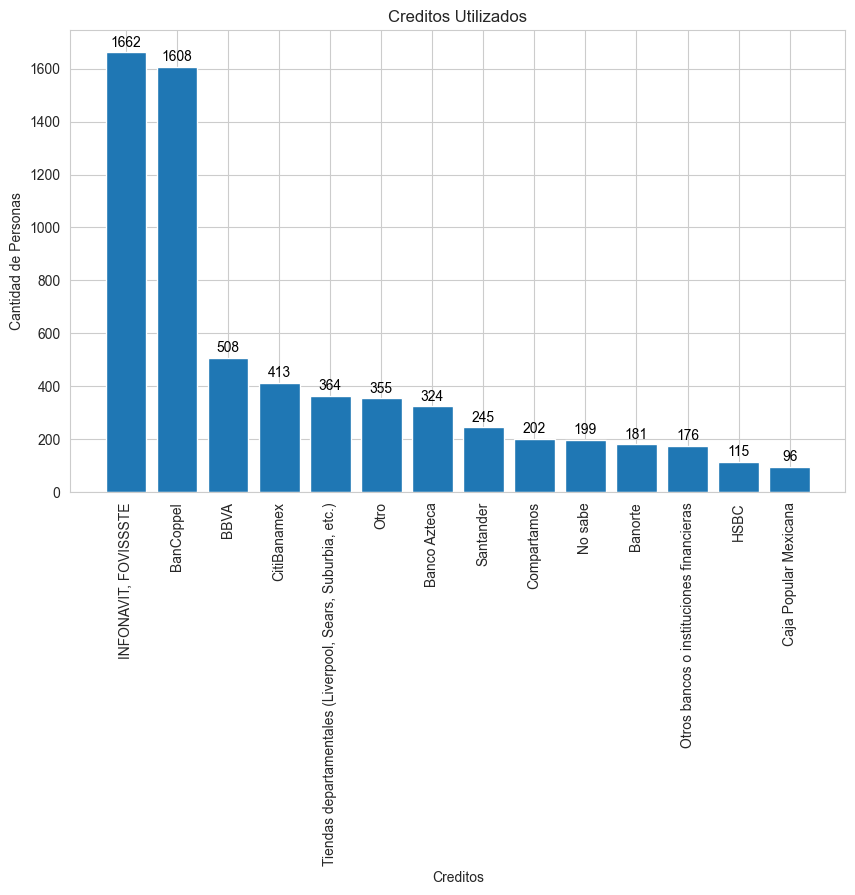

In [110]:
# Selecciona las columnas que contienen información sobre las instituciones o bancos
columnas_creditos = ['P6_8_01', 'P6_8_02', 'P6_8_03', 'P6_8_04', 'P6_8_05', 'P6_8_06', 'P6_8_07', 'P6_8_08', 'P6_8_09', 'P6_8_10', 'P6_8_09', 'P6_8_10', 'P6_8_10', 'P6_8_11', 'P6_8_12', 'P6_8_13', 'P6_8_99']  # Reemplaza con los nombres reales de las columnas

# Crea una lista para almacenar todas las instituciones o bancos
creditos_lista = []

# Concatena los datos de todas las columnas en una sola lista
for columna in columnas_creditos:
    creditos_lista.extend(tmodulo_df[columna])

# Crea un DataFrame a partir de la lista consolidada
creditos_df = pd.DataFrame({'Creditos': creditos_lista})

# Obtén las frecuencias de cada institución o banco
creditos_counts = creditos_df['Creditos'].value_counts()

# Excluir la institución con la frecuencia más alta
creditos_counts = creditos_counts.iloc[1:]  # Excluye la primera fila

# Crea un gráfico de barras para mostrar las instituciones o bancos con cuentas contratadas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias
bars = plt.bar(creditos_counts.index, creditos_counts.values)
plt.xlabel('Creditos')
plt.ylabel('Cantidad de Personas')
plt.title('Creditos Utilizados')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para mayor legibilidad

# Agrega etiquetas de cantidad en la parte superior de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

### ¿Cuáles son las razones por las que le negaron el crédito?

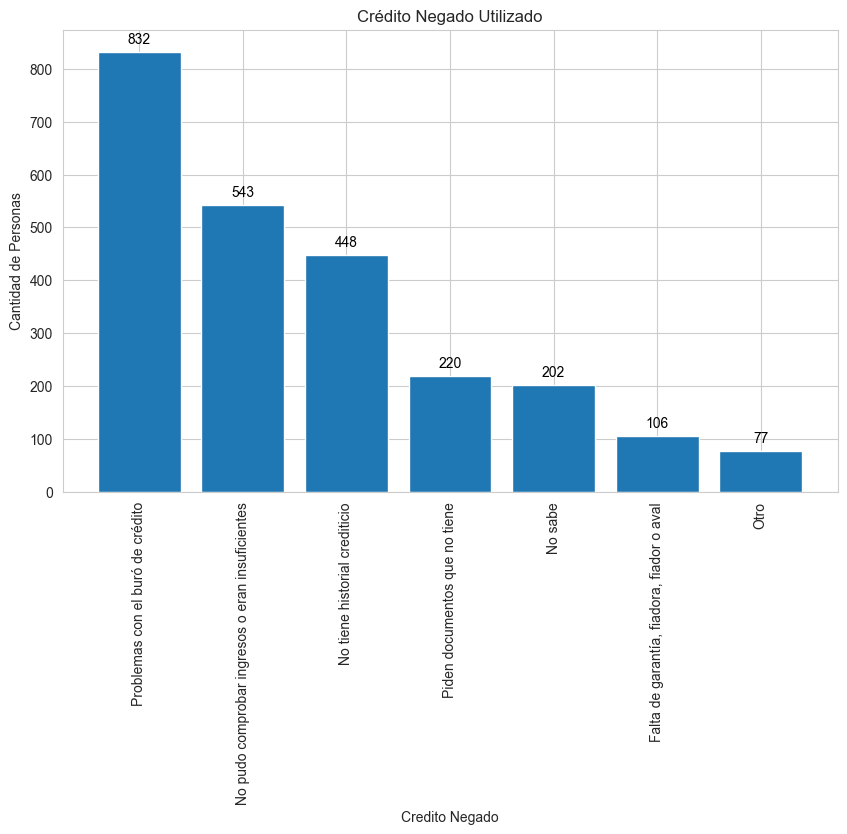

In [111]:
# Selecciona las columnas que contienen información sobre las instituciones o bancos
columnas_credito_negado = ['P6_18_1', 'P6_18_2', 'P6_18_3', 'P6_18_4', 'P6_18_5', 'P6_18_6', 'P6_18_9']  # Reemplaza con los nombres reales de las columnas

# Crea una lista para almacenar todas las instituciones o bancos
credito_negado_lista = []

# Concatena los datos de todas las columnas en una sola lista
for columna in columnas_credito_negado:
    credito_negado_lista.extend(tmodulo_df[columna])

# Crea un DataFrame a partir de la lista consolidada
credito_negado_df = pd.DataFrame({'Credito_Negado': credito_negado_lista})

# Obtén las frecuencias de cada institución o banco
credito_negado_counts = credito_negado_df['Credito_Negado'].value_counts()

# Excluir la institución con la frecuencia más alta
credito_negado_counts = credito_negado_counts.iloc[1:]  # Excluye la primera fila

# Crea un gráfico de barras para mostrar las instituciones o bancos con cuentas contratadas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias
bars = plt.bar(credito_negado_counts.index, credito_negado_counts.values)
plt.xlabel('Credito Negado')
plt.ylabel('Cantidad de Personas')
plt.title('Crédito Negado Utilizado')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para mayor legibilidad

# Agrega etiquetas de cantidad en la parte superior de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.show()


### ¿Qué forma de pago utiliza con más frecuencia cuando realiza compras?

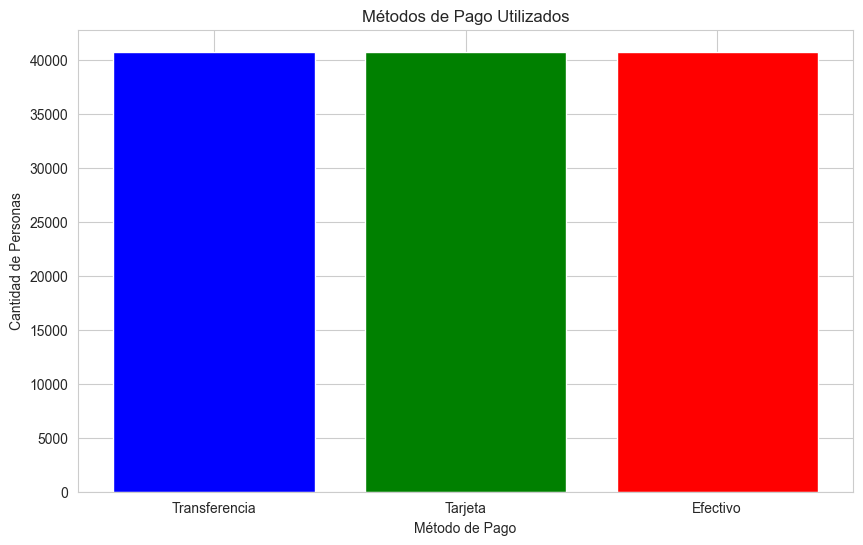

In [113]:
# p7_8_1_1 a p7_8_1_3, p7_8_2_1 a p7_8_2_3, p7_8_3_1 a p7_8_3_3, p7_8_4_1 a p7_8_4_3

# Crear un nuevo DataFrame con las columnas de interés
df_preguntas_metodos_pago = tmodulo_df[['P7_8_1_1', 'P7_8_1_2', 'P7_8_1_3', 'P7_8_2_1', 'P7_8_2_2', 'P7_8_2_3', 'P7_8_3_1', 'P7_8_3_2', 'P7_8_3_3', 'P7_8_4_1', 'P7_8_4_2', 'P7_8_4_3']].copy()

#p7_8_1_1, p7_8_2_1 , p7_8_3_1, p7_8_4_1 si el valor es 1 entonces es transferencia
#p7_8_1_2, p7_8_2_2 , p7_8_3_2, p7_8_4_2 si el valor es 1 entonces es tarjeta
#p7_8_1_3, p7_8_2_3 , p7_8_3_3, p7_8_4_3 si el valor es 1 entonces es efectivo

# Crear tuplas con los valores a reemplazar
col_val_pairs = [
    ('P7_8_1_1', 'Transferencia'),
    ('P7_8_1_2', 'Tarjeta'),
    ('P7_8_1_3', 'Efectivo'),
    ('P7_8_2_1', 'Transferencia'),
    ('P7_8_2_2', 'Tarjeta'),
    ('P7_8_2_3', 'Efectivo'),
    ('P7_8_3_1', 'Transferencia'),
    ('P7_8_3_2', 'Tarjeta'),
    ('P7_8_3_3', 'Efectivo'),
    ('P7_8_4_1', 'Transferencia'),
    ('P7_8_4_2', 'Tarjeta'),
    ('P7_8_4_3', 'Efectivo'),
]

def replace_values(df, col_val_pairs):
    for col, val in col_val_pairs:
        df[col] = df[col].replace({1: val, 2: np.nan})
# Reemplazar valores
replace_values(df_preguntas_metodos_pago, col_val_pairs)

# Cambiar el nombre de las columnas
df_preguntas_metodos_pago = df_preguntas_metodos_pago.rename(columns={col: val for col, val in col_val_pairs})

# Hacer count de los valores
df_preguntas_metodos_pago = df_preguntas_metodos_pago.count().reset_index(name='count')

# Sumar los valores de cada tipo de pago
df_preguntas_metodos_pago = df_preguntas_metodos_pago.groupby('index')['count'].sum().reset_index(name='count')

# Crear una lista de métodos de pago
metodos_pago = ['Transferencia', 'Tarjeta', 'Efectivo']

# Contar la cantidad de veces que aparece cada método de pago
conteos = [df_preguntas_metodos_pago.loc[i]['count'] for i in range(3)]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(metodos_pago, conteos, color=['blue', 'green', 'red'])
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Personas')
plt.title('Métodos de Pago Utilizados')
plt.show()